In [18]:
#7 Practical to implement Sentiment Analysis using MultinomialNB, BernoulliNB.

In [19]:
import re
import nltk
import random
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from nltk.classify.scikitlearn import SklearnClassifier

In [20]:
df=pd.read_csv("./IMDB Dataset.csv")

In [21]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
pos=df[df['sentiment']== 'positive']

neg=df[df['sentiment']== 'negative']

print(len(neg), len(pos))

25000 25000


In [23]:
files_pos=pos[0:1000]
files_neg=neg[0:1000]

print("length of files_pos",len(files_pos))
print("length of files_neg",len(files_neg))

length of files_pos 1000
length of files_neg 1000


In [24]:
all_words = []
documents=[]
cleaned = []
from nltk.corpus import stopwords

stop_words = list(set(stopwords.words('english')))


allowed_word_types =["J"]

count = 0


In [25]:
for p in files_pos['review']:
    documents.append((p, "pos"))
    #remove punctuation 
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    #tokenize
    tokenized = word_tokenize(cleaned)
    #remove stopwords
    stopped=[w for w in tokenized if not w in stop_words]
    #parts of speech tagging for each word
    pos=nltk.pos_tag(stopped)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0])

In [26]:
for p in files_neg['review']:
    documents.append((p, "neg"))
    #remove punctuation 
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    #tokenize
    tokenized = word_tokenize(cleaned)
    #remove stopwords
    stopped=[w for w in tokenized if not w in stop_words]
    #parts of speech tagging for each word
    pos=nltk.pos_tag(stopped)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0])

In [27]:
all_words

['first',
 'classic',
 'experimental',
 'high',
 'Irish',
 'shady',
 'awaybr',
 'main',
 'due',
 'painted',
 'charm',
 'first',
 'struck',
 'nasty',
 'ready',
 'accustomed',
 'high',
 'graphic',
 'crooked',
 'nickel',
 'mannered',
 'middle',
 'due',
 'comfortable',
 'uncomfortable',
 'touch',
 'wonderful',
 'little',
 'oldtimeBBC',
 'entire',
 'polari',
 'seamless',
 'guided',
 'diary',
 'terrificly',
 'masterful',
 'great',
 'little',
 'use',
 'traditional',
 'solid',
 'flat',
 'wonderful',
 'spend',
 'hot',
 'simplistic',
 'likable',
 'serial',
 'many',
 'grown',
 'lovebr',
 'right',
 'young',
 'wittier',
 'great',
 'vivid',
 'human',
 'different',
 'br',
 'theme',
 'present',
 'different',
 'connect',
 'next',
 'previous',
 'luxurious',
 'souls',
 'different',
 'big',
 'best',
 'human',
 'sincere',
 'fulfillment',
 'good',
 'good',
 'next',
 'alltime',
 'favorite',
 'selflessness',
 'noble',
 'old',
 'last',
 'sympathetic',
 'believable',
 'kid',
 'black',
 'white',
 'new',
 'advent

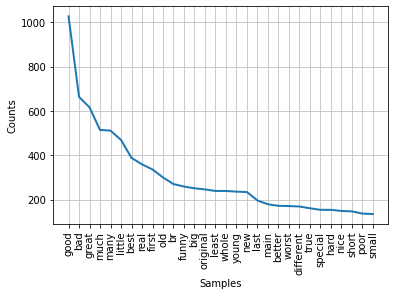

In [28]:
#freq of words
freq = nltk.FreqDist(all_words)
import matplotlib.pyplot as plt
freq.plot(30, cumulative = False)
plt.show()

In [29]:
#listing the 1000 most freqeunt words
word_features = list(freq.keys())[:1000]
word_features[10]

'charm'

In [30]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)
training_set = featuresets[:800]
testing_set = featuresets[800:]

In [35]:
MNB_clf = SklearnClassifier(MultinomialNB())
mnb_cls = MNB_clf.train(training_set)
print('Classifier accuracy percent', (nltk.classify.accuracy(mnb_cls, testing_set)) * 100, '%')

Classifier accuracy percent 75.83333333333333 %


In [37]:
MNB_clf = SklearnClassifier(BernoulliNB())
bnb_cls = MNB_clf.train(training_set)
print('Classifier accuracy percent: ', (nltk.classify.accuracy(bnb_cls, testing_set))*100, '%')

Classifier accuracy percent:  75.75 %
